In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
import os
os.environ['OMP_NUM_THREADS'] = '2'
df = pd.read_csv("heart-disease-dataset.csv")

In [30]:
df = df.replace('?', np.nan)
df = df.dropna()
df = df.astype(float)
X = df[['age', 'chol']]

C:\Users\Dotaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


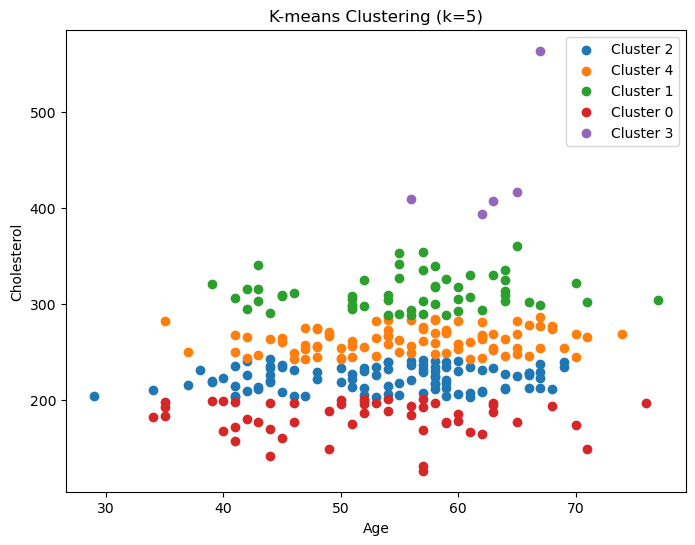

In [32]:
# 1. K-means clustering with k=5 and visualization
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['kmeans_5_clusters'] = kmeans_5.fit_predict(X)

plt.figure(figsize=(8, 6))
for cluster in df['kmeans_5_clusters'].unique():
    cluster_data = df[df['kmeans_5_clusters'] == cluster]
    plt.scatter(cluster_data['age'], cluster_data['chol'], label=f'Cluster {cluster}')
plt.title('K-means Clustering (k=5)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()